<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#lib-load" data-toc-modified-id="lib-load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>lib load</a></span></li><li><span><a href="#Qubit-def" data-toc-modified-id="Qubit-def-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Qubit def</a></span></li><li><span><a href="#Fi-ext-list" data-toc-modified-id="Fi-ext-list-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fi ext list</a></span></li><li><span><a href="#Exp-data" data-toc-modified-id="Exp-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exp data</a></span></li><li><span><a href="#Spectum" data-toc-modified-id="Spectum-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Spectum</a></span></li><li><span><a href="#Test-area" data-toc-modified-id="Test-area-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Test area</a></span><ul class="toc-item"><li><span><a href="#1/S" data-toc-modified-id="1/S-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>1/S</a></span></li><li><span><a href="#S" data-toc-modified-id="S-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>S</a></span></li><li><span><a href="#S(w)-fitting" data-toc-modified-id="S(w)-fitting-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>S(w) fitting</a></span></li><li><span><a href="#Extracted-S(w)" data-toc-modified-id="Extracted-S(w)-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Extracted S(w)</a></span></li><li><span><a href="#T1-vs-E" data-toc-modified-id="T1-vs-E-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>T1 vs E</a></span></li><li><span><a href="#T1-vs-ng" data-toc-modified-id="T1-vs-ng-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>T1 vs ng</a></span></li><li><span><a href="#Dispersive-shift" data-toc-modified-id="Dispersive-shift-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>Dispersive shift</a></span></li><li><span><a href="#Playing-with-parameters" data-toc-modified-id="Playing-with-parameters-6.8"><span class="toc-item-num">6.8&nbsp;&nbsp;</span>Playing with parameters</a></span></li><li><span><a href="#Martix-elements" data-toc-modified-id="Martix-elements-6.9"><span class="toc-item-num">6.9&nbsp;&nbsp;</span>Martix elements</a></span></li><li><span><a href="#Mel-vs-Ej/Ecl" data-toc-modified-id="Mel-vs-Ej/Ecl-6.10"><span class="toc-item-num">6.10&nbsp;&nbsp;</span>Mel vs Ej/Ecl</a></span></li><li><span><a href="#dEj" data-toc-modified-id="dEj-6.11"><span class="toc-item-num">6.11&nbsp;&nbsp;</span>dEj</a></span></li><li><span><a href="#grid" data-toc-modified-id="grid-6.12"><span class="toc-item-num">6.12&nbsp;&nbsp;</span>grid</a></span></li></ul></li><li><span><a href="#3d-Plots" data-toc-modified-id="3d-Plots-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>3d Plots</a></span></li></ul></div>

assymetry
dispesive shift for e and 2e
T1


In [7]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
color = next(ax._get_lines.prop_cycler)['color']

NameError: name 'ax' is not defined

## lib load

In [1]:
%matplotlib widget

In [1]:
%matplotlib notebook
%load_ext autoreload

%autoreload 2


import matplotlib.pyplot as plt
import numpy as np

from ACqubit import *
from ACstate import *
from wavefunction1d import *

#from tqdm import tqdm, tqdm_notebook
from tqdm.autonotebook import tqdm

from scipy.interpolate import interp1d

pi = np.pi

D:\anaconda\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [11]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Qubit def

In [2]:


J1 = 27.2
J2 = 1*J1+6

ACQB15 = ACQubit (E_CL = 10, 
              E_L = 0.94, 
              E_J = 27.2, 
              E_C = 7.7,
              dE_J = 6 )

ACQB15_symm = ACQubit (E_CL = 10, 
              E_L = 0.94, 
              E_J = 27.2, 
              E_C = 7.7,
              dE_J = 0 )

bands = [0,1,2]


In [4]:
np.unique(flux['0e'])

NameError: name 'flux' is not defined

## Fi ext list

In [3]:
    Nfi_ext = 51
    fi_ext_min, fi_ext_max = [-0*pi, 1*pi]
    fi_ext_list = np.linspace(fi_ext_min, fi_ext_max, Nfi_ext)[:]
    dfi_ext = ( fi_ext_max - fi_ext_min ) /Nfi_ext

## Exp data

In [4]:
# remove duplicant points from the data
def get_dup(records_array):
    vals, inverse, count = unique(records_array, return_inverse=True,
                                  return_counts=True)

    idx_vals_repeated = where(count > 0)[0]
    vals_repeated = vals[idx_vals_repeated]

    rows, cols = where(inverse == idx_vals_repeated[:, newaxis])
    _, inverse_rows = unique(rows, return_index=True)
    res = split(cols, inverse_rows[1:])
    
    return res

In [5]:
fdir = 'E:\\OneDrive - Rutgers University\\files_py\\expdata\\ACQB15\\'

ng_exp = ['0e', '1e']
flux0 = 2*60e-6

flux= dict()
T1 = dict()
E = dict()

T1_un = dict()
E_un = dict()
flux_un = dict()

for ng in ng_exp:
    
    data = np.genfromtxt(fdir+ f'B15_T1vsB_{ng}_full.dat')

    flux[ng] = data[:,0]/flux0
    T1[ng] = data[:,1]*1e-6
    E[ng] = data[:,2]

    
    ind_E_un = get_dup( E[ng] )
    E_un[ng] = np.unique( E[ng] )
    flux_un[ng] = np.array( [flux[ng][i] for i in sorted(np.unique(flux[ng], return_index=True)[1])]  )

    T_un_ = []
    for ind in ind_E_un:
        T_un_.append( np.max(  T1[ng][ind]  ) )

    T1_un[ng] = np.array(T_un_)



In [10]:
E_un['0e']

array([ 2.1 ,  2.2 ,  2.61,  3.37,  3.8 ,  4.27,  4.5 ,  5.1 ,  5.7 ,
        6.3 ,  6.4 ,  6.6 ,  6.7 ,  7.5 ,  7.8 ,  8.18,  8.35, 10.28,
       10.78, 11.28, 11.8 , 12.4 , 12.85, 13.4 , 13.85, 14.4 , 14.8 ,
       15.25, 15.5 ])

In [6]:
data = np.genfromtxt(fdir+ f'B15_T1vsV.dat')

Vg_2e = 2*0.54

Vg = data[:,0]/Vg_2e
T1Vg = data[:,1]*1e-6

ind_Vg_un = get_dup( Vg )
Vg_un = np.unique( Vg )
TVg_un_ = []
for ind in ind_Vg_un:
#     print(ind)
    TVg_un_.append( np.max(  T1Vg[ind]  ) )

T1Vg_un = np.array(TVg_un_)


<IPython.core.display.Javascript object>


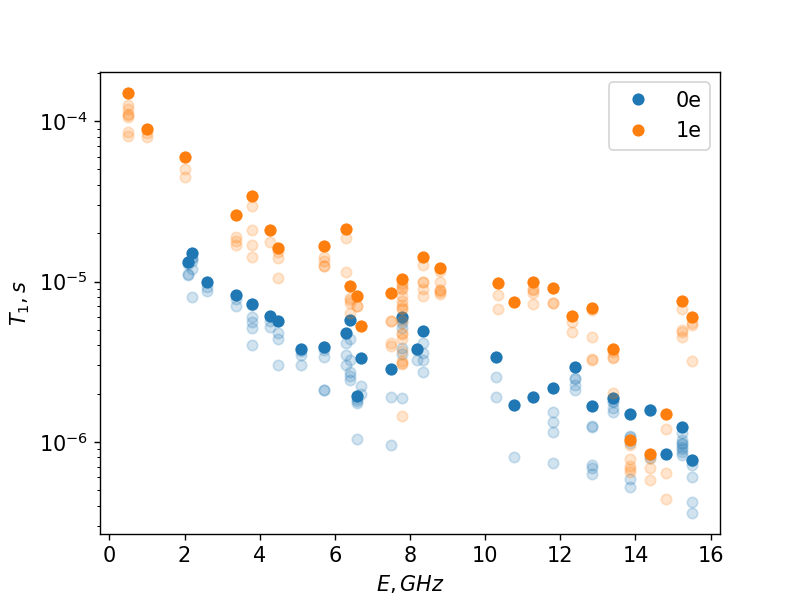

<IPython.core.display.Javascript object>


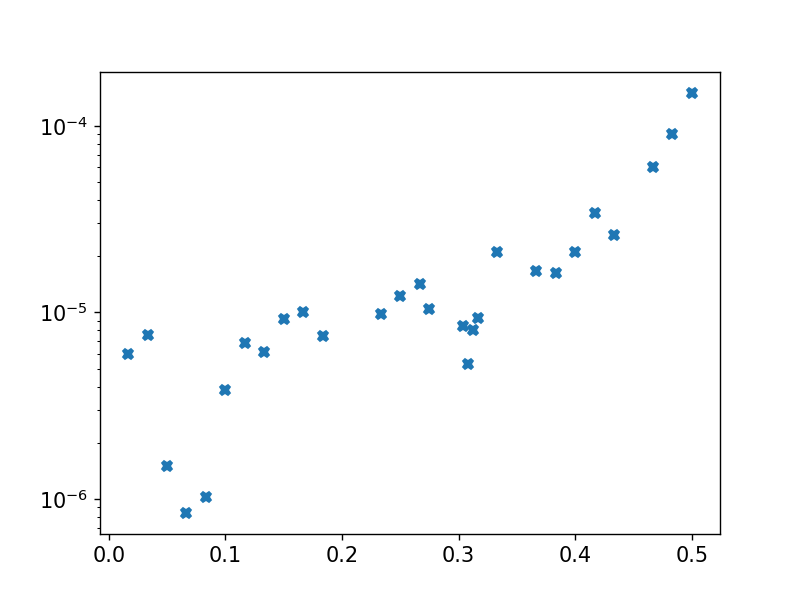

In [7]:
fig, ax = plt.subplots()

# color = next(ax._get_lines.prop_cycler)['color']
# ax_color_cycle = ax._get_lines.color_cycle


for ng in ['0e', '1e']:
    color = next(ax._get_lines.prop_cycler)['color']
    ax.plot(E[ng], T1[ng], 'o', color = color, alpha = 0.2 )
    ax.plot(E_un[ng], T1_un[ng], 'o', color = color, label = ng )



#     np.savetxt('T1_vs_flux_{}.txt'.format(ng), np.transpose([flux_un[ng],T1_un[ng]]), fmt='%.3e',  header="flux (Phi0), T1(s)")
np.savetxt('T1_vs_flux_{}.txt'.format('1e'), np.transpose([flux_un[ng][:-1],T1_un[ng]]), fmt='%.3e',  header="flux (Phi0), T1(s)")
fig, ax2 = plt.subplots()
ax2.plot( flux_un[ng][:-1],T1_un[ng], 'X')
ax2.set_yscale('log')

ax.set_yscale('log')
ax.set_xlabel('$E, GHz$')
ax.set_ylabel(r'$T_1,  s$')

ax.legend()

In [41]:
len((E['1e']))

106

Agustin

In [25]:
ACQ_Ag = ACQubit (E_CL = 18, 
                  E_L = 0.87, 
                  E_J = 37, 
                  E_C = 5,
                  dE_J = .297*37 )

In [53]:
ACQ_ = ACQubit (E_CL = 18, 
                  E_L = 0.87, 
                  E_J = 35, 
                  E_C = 8,
                  dE_J = 26 )

## Spectum

<IPython.core.display.Javascript object>


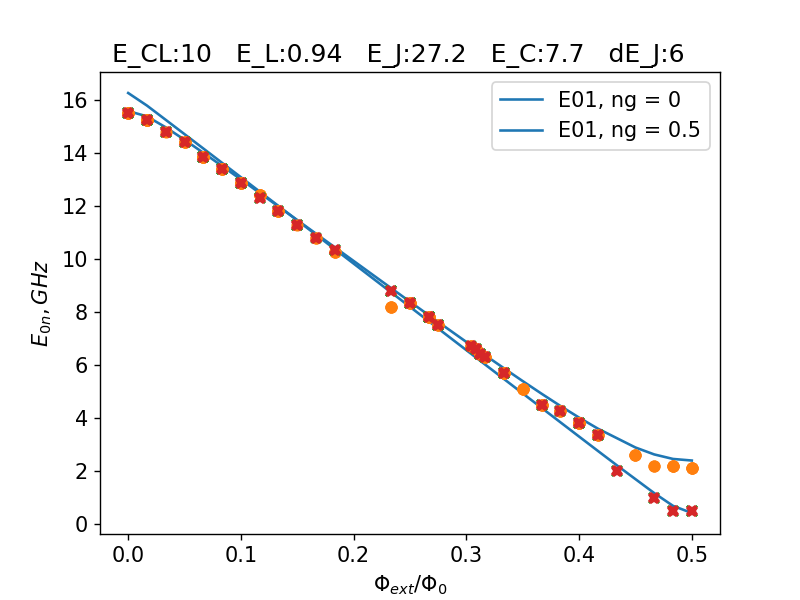

In [13]:
# Q = ACQ_
Q = ACQB15

ax = Q.plot_spectrum(fi_ext_list = 2*pi*np.unique(flux['0e']), ng_list = [ 0 ], bands = [[1]]) 
Q.plot_spectrum(fi_ext_list = 2*pi*np.unique(flux['1e']), ng_list = [  0.5 ], bands = [[1]], ax = ax ) 

ax.plot(flux['0e'], E['0e'], 'o' )
ax.plot(flux['1e'], E['1e'], 'x' )
# ax.plot( np.unique(flux['0e']),  np.unique(E['0e']), 'X')

# E0e_file = np.stack([flux['0e'],E['0e']] ) 
# E0e_file = np.concatenate([flux['0e'],E['0e']] ) 
un_fl, ind = np.unique(flux['1e'], return_index=True)
un_E = E['1e'][ind]

ax.plot( un_fl,  un_E, 'X')

np.savetxt('E_1e_vs_Flux.txt', np.transpose([un_fl,un_E]), fmt='%.3e',  header="Flux (Phi0), E_1e (GHz)")
# E0e_file

# ax.set_yscale('log')

In [11]:
st = ACQB15.set_state(0,0)

ACQB15.fi_grid

[-25.132741228718345, 25.132741228718345, 301]

<IPython.core.display.Javascript object>


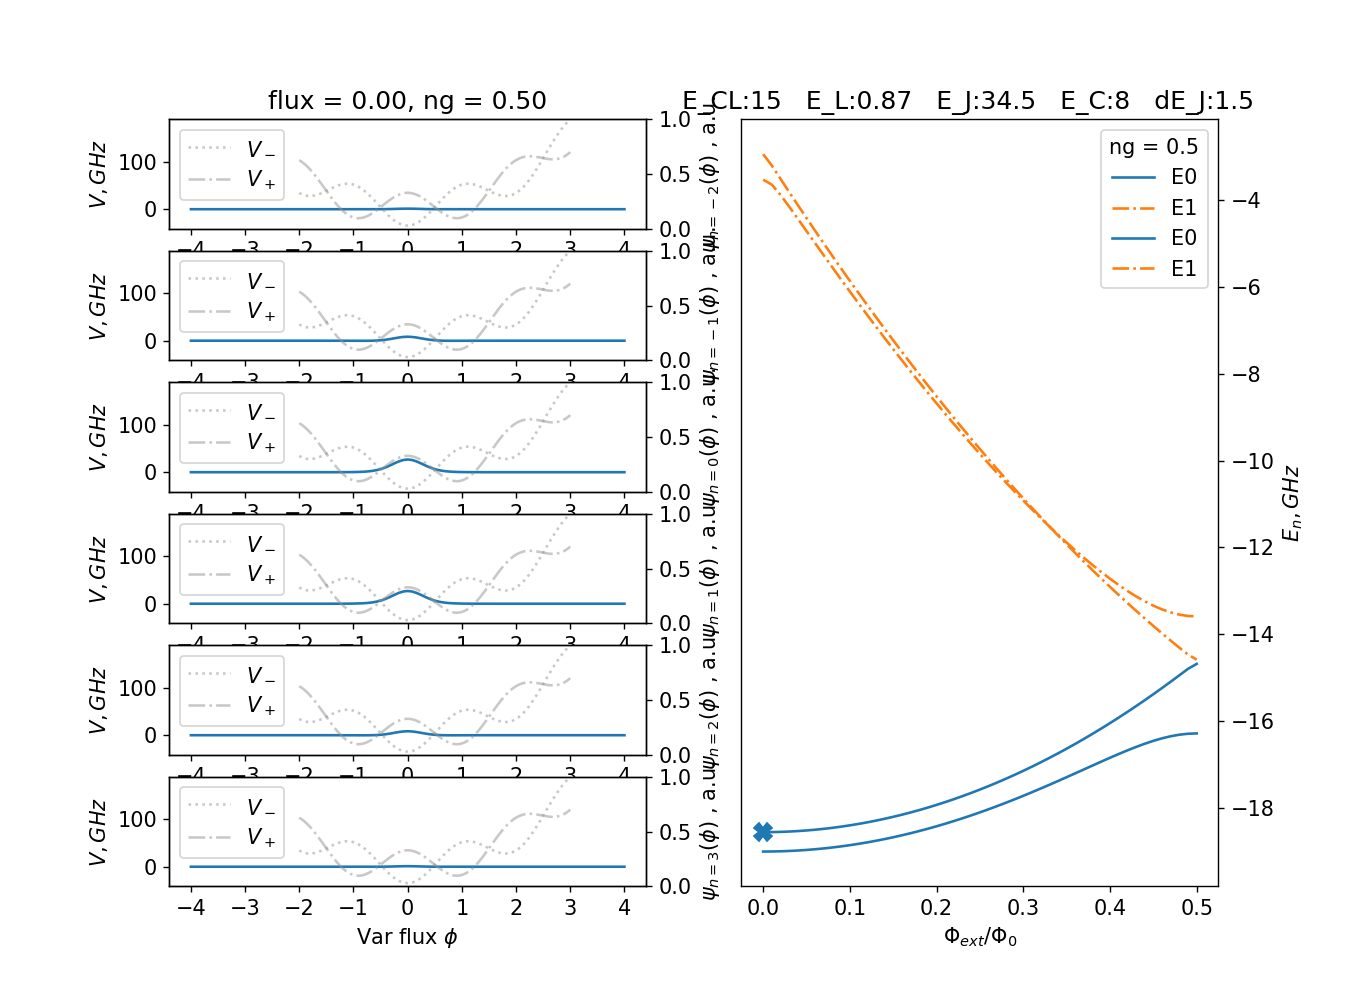

D:\anaconda\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(<Figure size 1500x1000 with 13 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x28e807797b8>])

In [13]:
ACQB15.plot_bands_Psi(  fi_ext_list, [0, 0.5],  [0,1] )

## Test area

### 1/S

In [ ]:
S = []
for f, t1 in zip( flux['0e'], T1['0e'] ) :
    st = ACQB15.set_state(fi_ext = 2*pi*f, ng = 0)
#     S.append( st.get_fi_ij(0,1)**2 * t1 * .87**2 )
    S.append( st.get_fi_ij(0,1)**2 * t1  )
    
fig, ax = plt.subplots()
ax.plot(E['0e'], 1e6*np.array(S), 'o', label = '0e')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel (r'$ E, GHz $ ')
ax.set_ylabel (r'$ {T_1 x |\langle 0| \hat{\phi}|1 \rangle|^2 }  , \mu s  $ ', color = 'C0') 
ax.legend()

x = np.linspace(.5, 16, 101)


# ax2 = ax.twinx()
# ax2.set_yscale('log')
# ax.plot( x, .40*x**1  )
ax.legend()

In [416]:
S = []
for f, t1 in zip( flux['1e'], T1['1e'] ) :
    st = ACQB15.set_state(fi_ext = 2*pi*f, ng = 0.5)
#     S.append( st.get_n_ij(0,1)**2 * t1 * 7**2)
    S.append( st.get_n_ij(0,1)**2 * t1)
    
# fig, ax = plt.subplots()



ax.plot(E['1e'], 1e6*np.array(S), 'o', color = 'C1', label = '1e')
ax.set_yscale('log')

ax.set_xlabel (r'$ E, GHz $ ')
# ax.set_ylabel (r'$ T_1 x |\langle 0| \hat{n}|1 \rangle|^2 ,\mu s $ ') 
ax.legend()

x = np.linspace(.5, 16, 101)


# ax2 = ax.twinx()
# ax2.set_yscale('log')
# ax.plot( x, .08*x**-1  )
ax.legend()

In [417]:
ax2 = ax.twinx()
lim = ax.get_ylim()


ax2.set_ylim(lim)
ax2.set_yscale('log')
ax2.set_ylabel (r'$ {T_1 x |\langle 0| \hat{n}|1 \rangle|^2 }   , \mu s \cdot  $ ', color = 'C1')

Text(0,0.5,'$ {T_1 x |\\langle 0| \\hat{n}|1 \\rangle|^2 }   , \\mu s \\cdot  $ ')

### S

<IPython.core.display.Javascript object>


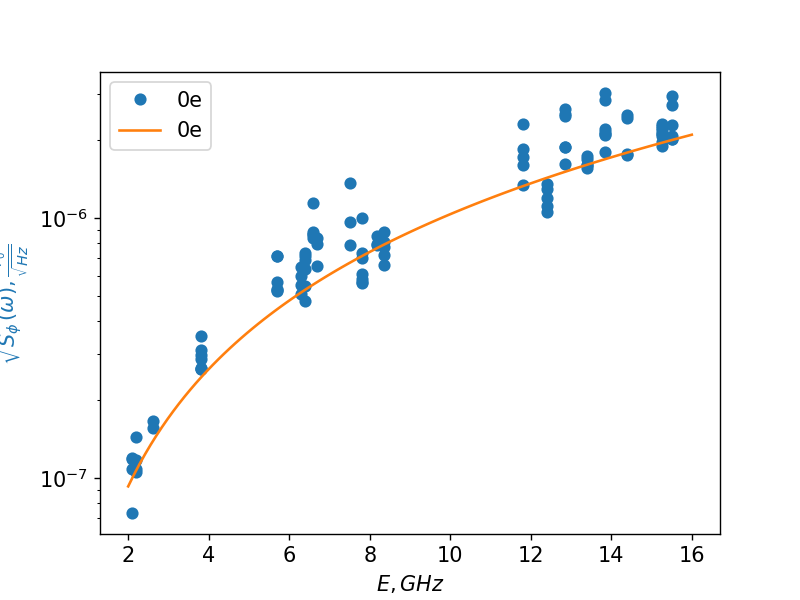

[  1.49802566 -17.23136759]


In [418]:
Sraw = []
for f, t1 in zip( flux['0e'], T1['0e'] ) :
    st = ACQB15.set_state(fi_ext = 2*pi*f, ng = 0)
#     S.append( st.get_fi_ij(0,1)**2 * t1 * .87**2 )
    Sraw.append( st.get_fi_ij(0,1)**2 * t1* ACQB15.E_L**2  )

S = np.sqrt(1e-18/np.array(Sraw))   
    
fig, ax = plt.subplots()
ax.plot(E['0e'], S, 'o', label = '0e')
ax.set_yscale('log')

ind_E_un = get_dup( E['0e'] )
E_un = np.unique( E['0e'] )

# print(ind_E_un)

S_un_ = []
for ind in ind_E_un:
#     print(ind)
    S_un_.append( np.min(  S[ind]  ) )

S_un = np.array(S_un_)

# ax.plot(E_un, S_un, 'X', label = '0e')


ax.set_xlabel (r'$ E, GHz $ ')
ax.set_ylabel (r'$ \sqrt{S_{\phi}}(\omega)  , \frac{\Phi_0}{\sqrt{Hz}}  $ ', color = 'C0') 
ax.legend()

x = np.linspace(2, 16, 101)


p = np.polyfit( np.log(E_un), np.log(S_un), 1 )

print(p)

fit = np.poly1d(p)

yx = np.interp(x, E_un, S_un )
# f = interp1d( E['0e'], np.sqrt(1e-18/np.array(S)) , 'linear')

ax.plot( x, np.exp(fit( np.log(x) )) , '-', label = '0e')


# ax2 = ax.twinx()
# ax2.set_yscale('log')
# ax.plot( x, .40*x**1  )
ax.legend()

In [ ]:
np.exp(-17.2)


<IPython.core.display.Javascript object>


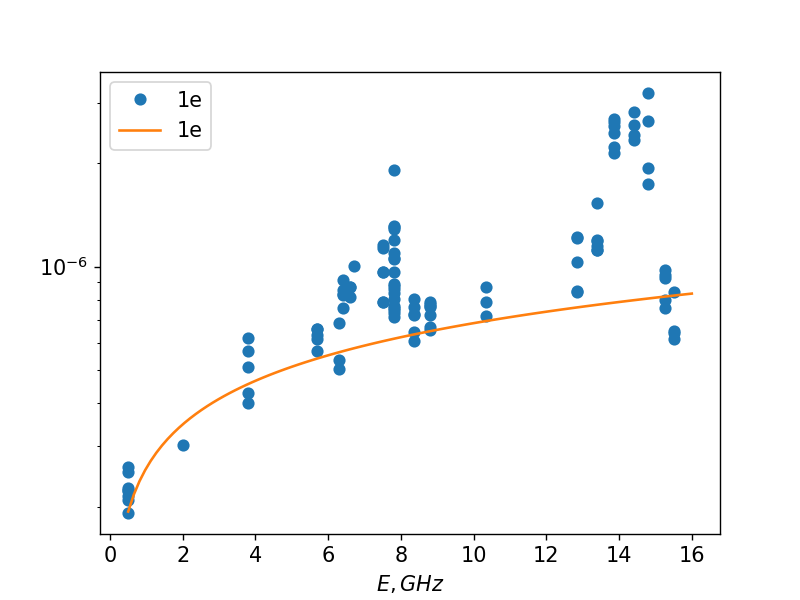

[  0.5    2.     3.8    5.7    6.3    6.4    6.6    6.7    7.5    7.8
   8.35   8.8   10.35  12.85  13.4   13.85  14.4   14.8   15.25  15.5 ]
[0 1 2 3 4 5 6 7]
[8]
[ 9 10 11 12 13]
[14 15 16 17 18]
[19 20 21]
[22 23 24 25 26]
[27 28 29]
[30]
[31 32 33 34 35 36]
[37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55]
[56 57 58 59 60 61]
[62 63 64 65 66 67 68]
[69 70 71]
[72 73 74 75 76]
[77 78 79 80 81 82]
[83 84 85 86 87 88]
[89 90 91 92]
[93 94 95 96]
[ 97  98  99 100 101]
[102 103 104 105]
[  0.42161358 -15.16523247]


In [419]:
Sraw = []
for f, t1 in zip( flux['1e'], T1['1e'] ) :
    st = ACQB15.set_state(fi_ext = 2*pi*f, ng = 0.5)

    Sraw.append( st.get_n_ij(0,1)**2 * t1* ACQB15.E_C**2  )

S = np.sqrt(1e-18/np.array(Sraw))   
    
fig, ax = plt.subplots()
ax.plot(E['1e'], S, 'o', label = '1e')
ax.set_yscale('log')


ind_E_un = get_dup( E['1e'] )


E_un = np.unique( E['1e'] )

print(E_un)

S_un_ = []
for ind in ind_E_un:
    print(ind)
    S_un_.append( np.min(  S[ind]  ) )

S_un = np.array(S_un_)

# ax.plot(E_un, S_un, 'X', label = '1e')
x = np.linspace(0.5, 16, 101)


idx = where(S_un < 8e-7)[0]

p = np.polyfit( np.log(E_un[idx]), np.log(S_un[idx]), 1 )

print(p)

fit = np.poly1d(p)

yx = np.interp(x, E_un, S_un )
# f = interp1d( E['0e'], np.sqrt(1e-18/np.array(S)) , 'linear')

ax.plot( x, np.exp(fit( np.log(x) )) , '-', label = '1e')




# ax.plot(E['1e'], np.sqrt(1e-18/np.array(S)), 'o', color = 'C1', label = '1e')
# ax.set_yscale('log')

ax.set_xlabel (r'$ E, GHz $ ')
# ax.set_ylabel (r'$ T_1 x |\langle 0| \hat{n}|1 \rangle|^2 ,\mu s $ ') 
ax.legend()

x = np.linspace(.5, 16, 101)


# ax2 = ax.twinx()
# ax2.set_yscale('log')
# ax.plot( x, .08*x**-1  )
ax.legend()

In [ ]:
np.exp(-15.15)

In [ ]:
ax2 = ax.twinx()
lim = ax.get_ylim()


ax2.set_ylim(lim)
ax2.set_yscale('log')
# (r'$ \sqrt{S_{\phi}}(\omega)  , \frac{\Phi_0}{\sqrt{Hz}}  $ '
ax2.set_ylabel (r'$ \sqrt{S_{n}}(\omega)  , \frac{e}{\sqrt{Hz}}  $ ', color = 'C1')

### S(w) fitting 

In [ ]:
for n_st in ['0e', '1e']:
    print(len(flux_un[n_st]), len(E_un[n_st]) )

In [32]:
def get_T_mel(Q,n_st, flux, T1):
    T_mel = []
#     E_scale = {'0e': Q.E_L, '1e' : Q.E_C }
    E_scale = {'0e': 1, '1e' : 1 }

    ng = {'0e' : 0, '1e' : 0.5 }
    
    for f, t1 in zip( flux, T1 ) :
        st = Q.set_state(fi_ext = 2*pi*f, ng = ng[n_st])
        
        if n_st == '0e':
            mel = st.get_fi_ij(0,1)
        elif n_st == '1e':
            mel = st.get_n_ij(0,1)
        else: 
            raise ValueError('n_st should be 0e or 1e') 
            
        T_mel.append( mel**2 * t1* E_scale[n_st]**2  )

    return np.array(T_mel)
    
fig, ax = plt.subplots()
S = dict()
S_un = dict()

# Q = ACQ_Ag
Q = ACQB15

for n_st in ['0e', '1e']:
    
    color = next(ax._get_lines.prop_cycler)['color']
    
    T_mel = get_T_mel(ACQB15 , n_st, flux[n_st], T1[n_st])
    S[n_st] = 1/T_mel   
    ax.plot(E[n_st], S[n_st], 'o',  alpha = 0.1, color = color)
    
    T_mel_un = get_T_mel(Q , n_st, flux_un[n_st], T1_un[n_st])
    S_un[n_st] = 1/T_mel_un   
    ax.plot(E_un[n_st], S_un[n_st], 'o', label = n_st, color = color)
    
    
    ax.set_yscale('log')
    ax.set_xscale('log')



    x = np.linspace(1, 16, 101)
    
    if n_st == '1e':
        idx = where(S_un[n_st] < 6.4e7)[0]
        p = np.polyfit( np.log(E_un[n_st] [idx]), np.log(S_un[n_st][idx]), 1 )

    else:
        
        p = np.polyfit( np.log(E_un[n_st]), np.log(S_un[n_st]), 1 )

    print(p[0], np.exp(p[1]))

    fit = np.poly1d(p)

#     yx = np.interp(x, E_un[n_st], S_un[n_st] )
#     # f = interp1d( E['0e'], np.sqrt(1e-18/np.array(S)) , 'linear')

    ax.plot( E_un[n_st], np.exp(fit( np.log(E_un[n_st]) )) , '--', color = color)


ax.lines[2].set_label(r'$S_{\phi}(\omega) \sim \omega^3$' )    
ax.lines[-1].set_label(r'$S_{n}(\omega) \sim \omega^{0.92}$' )    



ax.set_xlabel (r'$ E, GHz $ ')
# ax.set_ylabel (r'$ S_{\phi}(\omega)  , \frac{\Phi_0^2}{GHz}  $ ', color = 'C0') 
ax.set_ylabel (r'$ S_{\phi}(\omega)  , \frac{1}{s}  $ ', color = 'C0') 
ax.legend()


ax2 = ax.twinx()
lim = ax.get_ylim()


ax2.set_ylim(lim)
ax2.set_yscale('log')
ax2.set_ylabel (r'$ S_{n}(\omega)  , \frac{1}{s}  $ ', color = 'C1') 


D:\anaconda\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


FigureCanvasNbAgg()

2.9963347176269344 816.235032941111
0.9251607359746341 4155693.146080759


Text(0, 0.5, '$ S_{n}(\\omega)  , \\frac{1}{s}  $ ')

### Extracted S(w)

In [11]:
def Sn(w):
    return (64300)*w**0.93


def Sfi(w):
    return (1100)*w**3


In [12]:
w = np.logspace(0.1, 1, 201)

fig, ax = plt.subplots()
ax.plot(w, Sfi(w)**.5*1e-9, label = r'$S_{\phi}(\omega) \sim \omega^3$')
ax.plot(w, Sn(w)**.5*1e-9, label = r'$S_n(\omega)\sim \omega^{0.92}$')


ax.set_xlabel('$E, GHz$')
ax.set_ylabel (r'$ \sqrt{S_{\phi}}(\omega)  , \frac{\Phi_0}{\sqrt{Hz}}  $ ', color = 'C0') 

ax.set_xscale('log')
ax.set_yscale('log')

ax.legend()


ax2 = ax.twinx()
lim = ax.get_ylim()


ax2.set_ylim(lim)
ax2.set_yscale('log')
# (r'$ \sqrt{S_{\phi}}(\omega)  , \frac{\Phi_0}{\sqrt{Hz}}  $ '
ax2.set_ylabel (r'$ \sqrt{S_{n}}(\omega)  , \frac{e}{\sqrt{Hz}}  $ ', color = 'C1')

FigureCanvasNbAgg()

Text(0, 0.5, '$ \\sqrt{S_{n}}(\\omega)  , \\frac{e}{\\sqrt{Hz}}  $ ')

In [13]:
Cc = 1.6e-19/10e-3


Cl = (1.6e-19)**2/2/15e9/6.64e-34
print(Cc)

# 4.2e-3*6.5e3/(Cc/(Cc+Cj))**2*(2*pi)**2 / 1e6

1.5999999999999998e-17


In [ ]:
816e-27 / (2*pi)**2 /(6.5e3) / Cc**2/  1e6

In [ ]:
(2*pi*1e9*Cl*6e3)**2*10e6/6e3 * 1e9

In [ ]:
(1e9*6.5e3*Cc)**2

In [ ]:


def get_T1(Q, fi_ext, ng, i = 0, j = 1):


    
    def get_T1_phi(Q, fi_ext, ng, i , j ):
 
        st = Q.set_state(ng = ng,fi_ext = fi_ext)
        kT = 1 #GHz
        
        E = st.get_E()
        w = (E[j] - E[i])
        fi_ij = st.get_fi_ij(i, j)

        return   1/(   fi_ij**2 * Q.E_L**2 * Sfi(w) )   


    def get_T1_n(Q, fi_ext, ng, i , j ):

        st = Q.set_state(ng = ng,fi_ext = fi_ext)
        E = st.get_E()
        w = (E[j] - E[i])
        n_ij = st.get_n_ij(i, j)
        
        return 1/( n_ij**2 * Q.E_C**2 * Sn(w) ) 
    
    st = Q.set_state(ng = ng,fi_ext = fi_ext)
    E = st.get_E()
    w = (E[j] - E[i])
 

    return w, 1/( 1/get_T1_phi(Q, fi_ext, ng, i = 0, j = 1) + 1/get_T1_n(Q, fi_ext, ng, i = 0, j = 1) )


In [5]:
(1.6e-19/10e-3)


1.5999999999999998e-17

In [16]:


def get_T1_M(Q,  fi_ext, ng, i = 0, j = 1):

    
    Cc = 1.6e-19/10e-3

    Cj = (1.6e-19)**2/2/7e9/6.64e-34

    Cl = (1.6e-19)**2/2/15e9/6.64e-34

    Rq = 6.5e3
    
    R = 1.0e4
#     R = 1.5e0

    
    
    def get_T1_phi_M(Q, Cj, fi_ext, ng, i , j ):
 
        st = Q.set_state(ng = ng,fi_ext = fi_ext)
        kT = 1 #GHz
        
        E = st.get_E()
        f = (E[j] - E[i])
        fi_ij = st.get_fi_ij(i, j)

        return   1/( (2*pi)**2 * (f*1e9*Rq*Cc)**2 * R/Rq * f*1e9*  fi_ij**2    )   


    def get_T1_n_M(Q, Cj, fi_ext, ng, i , j ):

        st = Q.set_state(ng = ng,fi_ext = fi_ext)
        E = st.get_E()
        f = (E[j] - E[i])
        n_ij = st.get_n_ij(i, j)
        
        return 1/( (2*pi)**2*(Cc/(Cc+Cj))**2 * R/Rq* f*1e9*  n_ij**2    )
    
    st = Q.set_state(ng = ng,fi_ext = fi_ext)
    E = st.get_E()
    f = (E[j] - E[i])
 

    return f, 1/( 1/get_T1_phi_M(Q,  Cj, fi_ext, ng, i = 0, j = 1) + 1/get_T1_n_M(Q, Cj, fi_ext, ng, i = 0, j = 1) )


In [8]:


def get_T1_A(Q,  fi_ext, ng, i = 0, j = 1):

    
    Cc = 1.6e-19/10e-3

    Cj = (1.6e-19)**2/2/7e9/6.64e-34

    Cl = (1.6e-19)**2/2/15e9/6.64e-34

    Rq = 6.5e3
    
    R = 1.0e4
#     R = 1.5e0

    
    
    def get_T1_phi_A(Q, fi_ext, ng, i , j ):
 
        beta_phi = 1
        r_env_phi    = 13/Rq
        
        st = Q.set_state(ng = ng,fi_ext = fi_ext)
        kT = 1 #GHz
        
        E = st.get_E()
        f = (E[j] - E[i])
        fi_ij = st.get_fi_ij(i, j)

        return   1/( (beta_phi)**2 * (f/8/Q.E_CL)**2 * r_env_phi * f*1e9*  fi_ij**2 *(1 + 1/np.tanh( f/2/kT ))   )   


    def get_T1_n_A(Q, fi_ext, ng, i , j ):

        beta_n     = 1
        r_env_n    = 5/Rq
        kT = 1
        
        st = Q.set_state(ng = ng,fi_ext = fi_ext)
        E = st.get_E()
        f = (E[j] - E[i])
        n_ij = st.get_n_ij(i, j)
        
        return 1/( (beta_n)**2 * r_env_n* f*1e9*  n_ij**2 *(1 + 1/np.tanh( f/2/kT )   ) )
    
    st = Q.set_state(ng = ng,fi_ext = fi_ext)
    E = st.get_E()
    f = (E[j] - E[i])
 

    return f, 1/( 1/get_T1_phi_A(Q,   fi_ext, ng, i = 0, j = 1) + 1/get_T1_n_A(Q,  fi_ext, ng, i = 0, j = 1) )


### T1 vs E

In [29]:

J1 = 100
J2 = 1*J1+6
Q_ideal = ACQubit (E_CL = 7, 
              E_L = 0.01, 
              E_J = (J1+J2)/2, 
              E_C = 35,
              dE_J = (J2-J1)/2 )

<IPython.core.display.Javascript object>


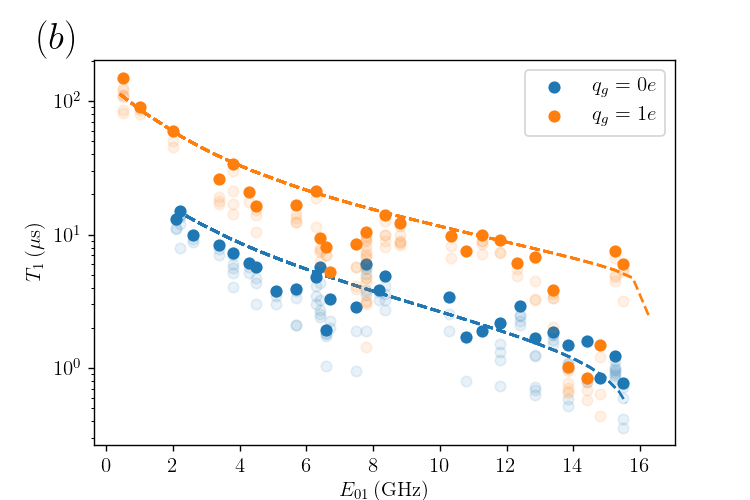

In [40]:
# Q = ACQ_Ag
Q = ACQB15
# Q = Q_ideal


fig, ax = plt.subplots(figsize = (6,4))

ng_map = {'0e' : 0, '1e' : 0.5 }

lab_map = {'0e': r'$q_g = 0e$', '1e': r'$q_g = 1e$'  }


for ng in ['0e', '1e']:

    T_th = []
    E_th = []

    color = next(ax._get_lines.prop_cycler)['color']
    ax.plot(E[ng], T1[ng]*1e6, 'o', color = color, alpha = 0.1 )
    ax.plot(E_un[ng], T1_un[ng]*1e6, 'o', color = color, label = lab_map[ng] )

    for fi_ext in 2*np.pi*flux_un[ng]:
        w, t = get_T1_A(Q, fi_ext, ng_map[ng], i = 0, j = 1)
        T_th.append (t*1e6)
        E_th.append( w   )

        ax.plot(E_th, T_th, '--', color = color)



ax.set_yscale('log')
# ax.set_xscale('log')

ax.set_xlabel('$E_{01}\, \mathrm{(GHz)}$')
ax.set_ylabel(r'$T_1\,  (\mu \mathrm{s})$')

fig.text (0.05, .9, r'$(b)$', fontsize = 22)

ax.legend()

plt.savefig('decay b.pdf', transperent = True)

In [62]:
# EJ_list = np.logspace(0 , 2, 101)
EJ_list = np.linspace(1 , 101, 21)


T_0 = []
T_1 = []
dE_phi = [] 
dE_n = [] 


for EJ in tqdm(EJ_list):
    J1 = EJ
    J2 = 1.2*J1
    
    Q = ACQubit (E_CL = 7, 
                  E_L = 0.05, 
                  E_J = (J1+J2)/2, #33
                  E_C = 15,
                  dE_J = (J2-J1)/2 )  #6.5 

    
    
    Q.set_grid( fi_grid= [-16*pi, 16*pi, 201], Q_grid = [-4, 5])

    w, t = get_T1_A(Q, fi_ext = 2*pi*0.5, ng = .5, i = 0, j = 1)

    st_00  =  Q.set_state(ng = 0,   fi_ext = 0)
    st_0pi =  Q.set_state(ng = 0,   fi_ext = pi)
    st_e0  =  Q.set_state(ng = 0.5, fi_ext = 0)
    st_epi =  Q.set_state(ng = 0.5, fi_ext = pi)
    
    E_phi = (st_e0.get_spectrum() - st_epi.get_spectrum())[0]
    E_n   = (st_0pi.get_spectrum() - st_epi.get_spectrum())[0]
    
    T_1.append(t)
    dE_phi.append(E_phi)
    dE_n.append(E_n)

<IPython.core.display.Javascript object>


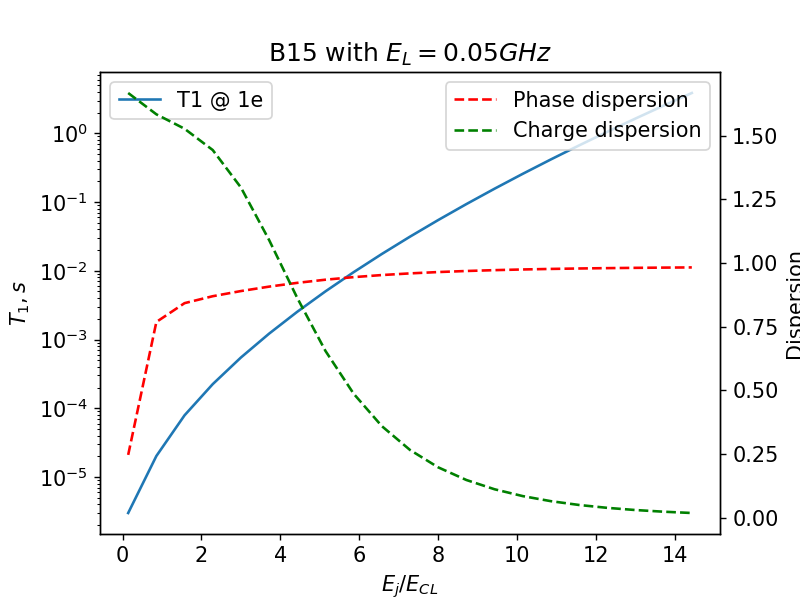

Text(0.5, 1.0, 'B15 with $E_L = 0.05 GHz $')

In [63]:
fig, ax = plt.subplots()
ax.plot(EJ_list/Q.E_CL, T_1, label = 'T1 @ 1e')

ax.set_yscale('log')

ax.set_xlabel(r'$E_j/E_{CL}$')
ax.set_ylabel(r'$T_1, s$')

ax_tw = ax.twinx()

ax_tw.plot(EJ_list/Q.E_CL, dE_phi,'r--', label = 'Phase dispersion' )
ax_tw.plot(EJ_list/Q.E_CL, dE_n, 'g--',  label = 'Charge dispersion' )

ax_tw.set_ylabel('Dispersion')

ax.legend()
ax_tw.legend()

plt.title(r'B15 with $E_L = 0.05 GHz $')

In [64]:
2*np.sqrt(pi/2)*np.exp(-pi**2)

0.0001296508009924801

### T1 vs ng

<IPython.core.display.Javascript object>


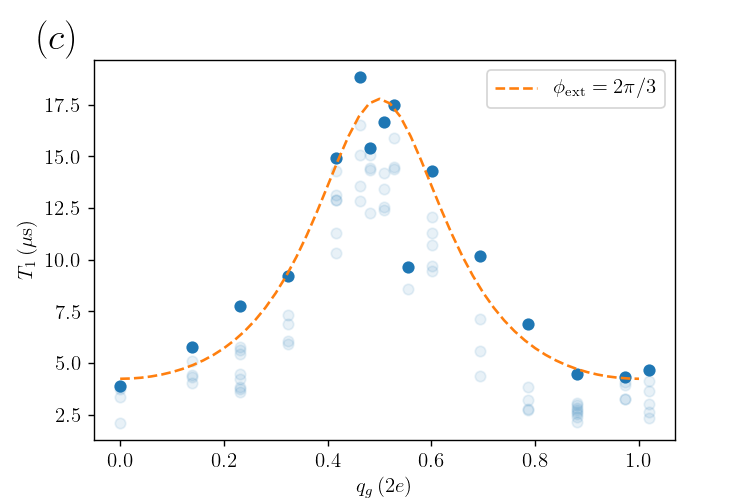

In [39]:
fig, ax = plt.subplots(figsize = (6,4))

ax.plot(Vg, T1Vg*1e6, 'o', alpha = 0.1, color = 'C0')
ax.plot(Vg_un, T1Vg_un*1e6, 'o', color = 'C0' )


T = []

# ng_list = np.unique(Vg)
ng_list = np.linspace(0,1, 51)

for ng in ng_list:
    _, t = get_T1_A(ACQB15, fi_ext = 1.7*pi/3,ng = ng, i = 0, j = 1)
    T.append(t*1e6)
    
ax.plot(ng_list, T, '--', color = 'C1', label = r'$\phi_{\mathrm{ext}} = 2\pi/3$')

# ax.set_yscale('log')

# ax.set_xlabel('$n_g, 2e$')
# ax.set_ylabel(r'$T_1,  \mu s$')

ax.legend()


np.savetxt('T1_vs_gate.txt', np.transpose([Vg_un, T1Vg_un]), fmt='%.3e',  header="Gate V (2e), T1(s)")


ax.set_xlabel('$q_g \, (2e)$')
ax.set_ylabel(r'$T_1\,  (\mu \mathrm{s})$')

fig.text (0.05, .9, r'$(c)$', fontsize = 22)

ax.legend()

fig.subplots_adjust(bottom=0.12)

plt.savefig('decay c.pdf', transperent = True)

### Dispersive shift

<IPython.core.display.Javascript object>


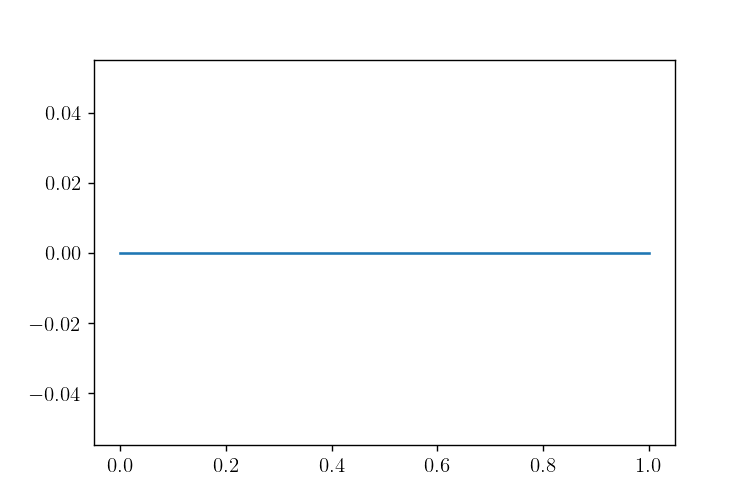

In [45]:
Q =ACQB15

fig, ax = plt.subplots(figsize = (6,4))


ng_list = np.linspace (0,1,11)



sh = Q.iterate_ng( ng_list, 2*pi*0.48, 'get_chi_i', 1,0)  
ax.plot(ng_list, sh)

### Playing with parameters

In [ ]:
R_list = np.logspace(3, 5, 101)

T_0 = []
T_1 = []

for r in R_list:
    _, t = get_T1_M(ACQB15,r, fi_ext = 2*pi*4/6,ng = 0, i = 0, j = 1)
    T_0.append(t*1e6)
    _, t = get_T1_M(ACQB15,r, fi_ext = 2*pi*4/6,ng = 0.5, i = 0, j = 1)
    T_1.append(t*1e6)
    
fig, ax = plt.subplots()
ax.plot(R_list, T_0, '-', label = '0e')    
ax.plot(R_list, T_1, '-', label = '1e')

ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'$T_1,  \mu s$')
ax.set_xlabel(r'$RC_c^2 (env. losses), a.u$')
    

In [406]:
(1.6e-19)**2/2/20e-15/6.64e-34 / 1e9


0.963855421686747

In [10]:
C_list = np.logspace(-16,-14, 51)

T_0 = []
T_1 = []

for c in tqdm(C_list):
    J1 = 33
    J2 = 1*J1+13

    E_C = (1.6e-19)**2/2/c/6.64e-34 / 1e9
    
    Q = ACQubit (E_CL = 15, 
                  E_L = 0.87, 
                  E_J = (J1+J2)/2, #33
                  E_C = E_C,
                  dE_J = (J2-J1)/2 )  #6 
    
    
    _, t = get_T1_M(Q, c, fi_ext = 2*pi*4/6,ng = 0, i = 0, j = 1)
    T_0.append(t*1e6)
    _, t = get_T1_M(Q, c, fi_ext = 2*pi*4/6,ng = 0.5, i = 0, j = 1)
    T_1.append(t*1e6)
    

    

<IPython.core.display.Javascript object>


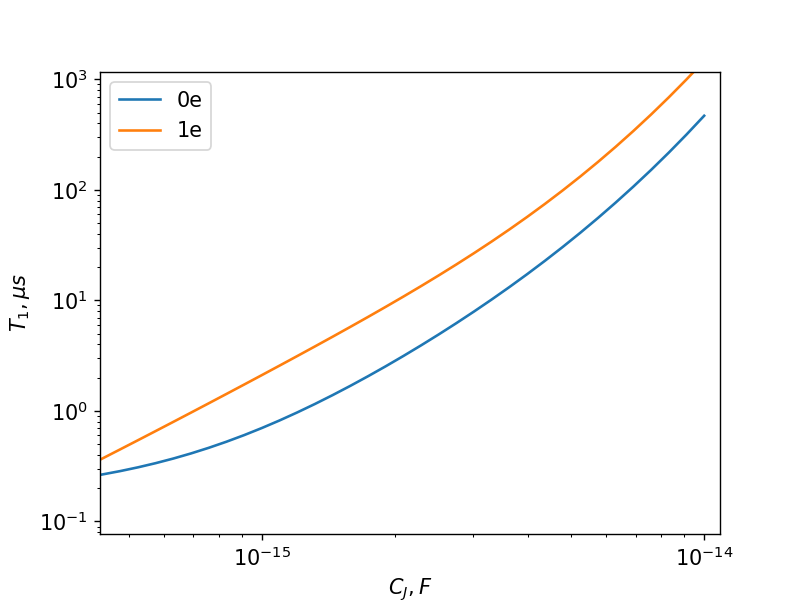

Text(0.5,0,'$C_J , F$')

In [11]:
fig, ax = plt.subplots()
ax.plot(C_list, T_0, '-', label = '0e')    
ax.plot(C_list, T_1, '-', label = '1e')

ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'$T_1,  \mu s$')
ax.set_xlabel(r'$C_J , F$')

In [407]:
EL_list = np.logspace(-3 , 0, 101)

T_0 = []
T_1 = []

for EL in tqdm(EL_list):
    J1 = 33
    J2 = 1*J1+13

    E_C = (1.6e-19)**2/2/c/6.64e-34 / 1e9
    
    Q = ACQubit (E_CL = 15, 
                  E_L = EL, 
                  E_J = (J1+J2)/2, #33
                  E_C = 1,
                  dE_J = (J2-J1)/2 )  #6.5 
    
    
    _, t = get_T1_M(Q, 20e-15, fi_ext = 2*pi*4/6,ng = 0, i = 0, j = 1)
    T_0.append(t*1e6)
    _, t = get_T1_M(Q, 20e-15, fi_ext = 2*pi*4/6,ng = 0.5, i = 0, j = 1)
    T_1.append(t*1e6)
    

    

<IPython.core.display.Javascript object>


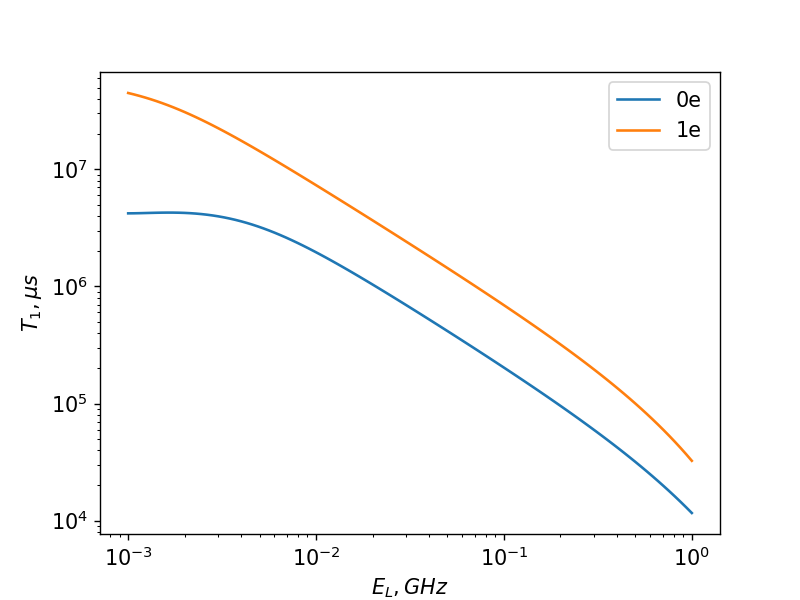

Text(0.5,0,'$E_L , GHz$')

In [408]:
fig, ax = plt.subplots()
ax.plot(EL_list, T_0, '-', label = '0e')    
ax.plot(EL_list, T_1, '-', label = '1e')

ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'$T_1,  \mu s$')
ax.set_xlabel(r'$E_L , GHz$')

<IPython.core.display.Javascript object>


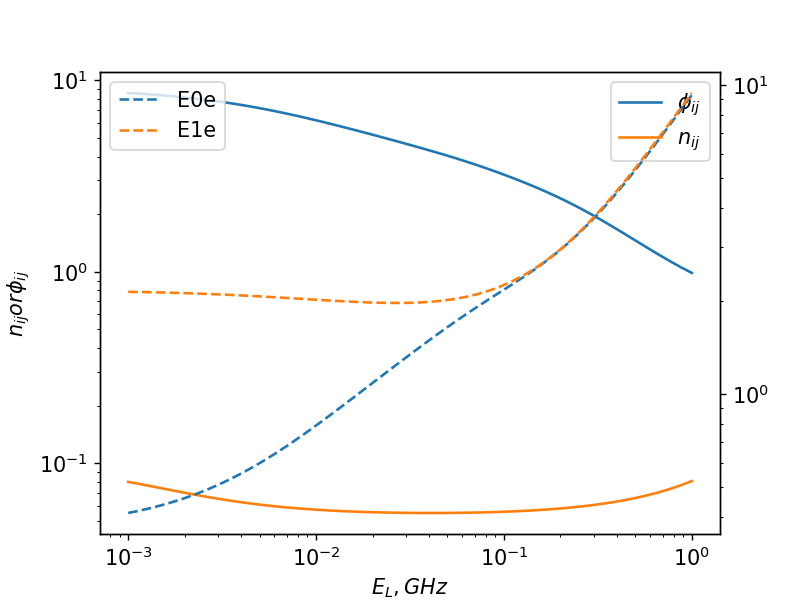

<IPython.core.display.Javascript object>


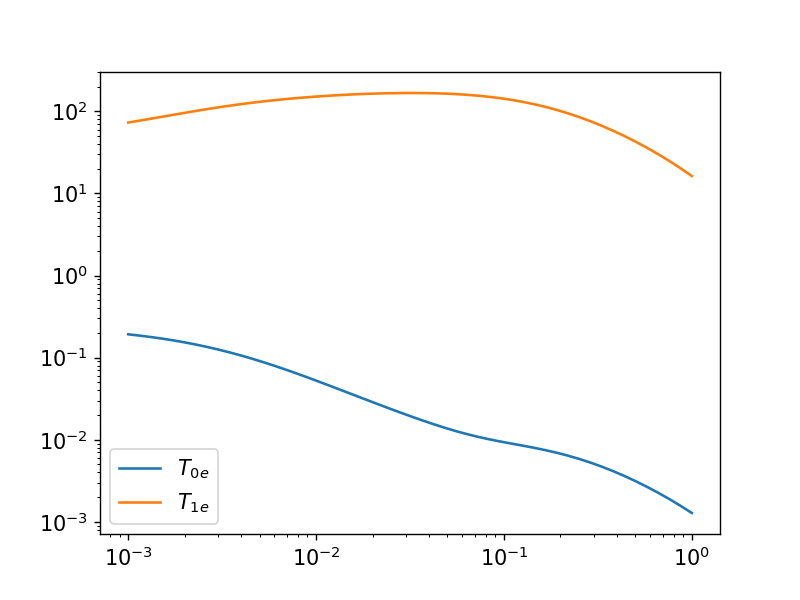

In [451]:
EL_list = np.logspace(-3 , 0, 51)

fi_ij = []
n_ij = []

E_0e = []
E_1e = []

T_0e = []
T_1e = []



J1 = 33
J2 = 1*J1+0

E_C = (1.6e-19)**2/2/c/6.64e-34 / 1e9

Q = ACQubit (E_CL = 15, 
              E_L = EL, 
              E_J = (J1+J2)/2, #33
              E_C = 8,
              dE_J = (J2-J1)/2 )  #6.5 


# Qs = [ACQubit (E_CL = 15,E_L = EL, E_J = (J1+J2)/2, E_C = 8, dE_J = (J2-J1)/2 ) for EL in EL_list] 

Qs1 = [ACQubit (E_CL = 15,E_L = EL, E_J = (J1+J2)/2, E_C = 8, dE_J = (J2-J1)/2 ) for EL in EL_list]

for q in tqdm(Qs1):
#     J1 = 33
#     J2 = 1*J1+13

#     E_C = (1.6e-19)**2/2/c/6.64e-34 / 1e9
    
#     Q = ACQubit (E_CL = 15, 
#                   E_L = EL, 
#                   E_J = (J1+J2)/2, #33
#                   E_C = 8,
#                   dE_J = (J2-J1)/2 )  #6.5 
    Q = q
    
    st0e = Q.set_state(ng = 0, fi_ext = 2*pi*0.25)
    st1e = Q.set_state(ng = 0.5, fi_ext = 2*pi*0.25)
    
    fi_ij.append( st0e.get_fi_ij(0,1) )
    n_ij.append( st1e.get_n_ij(0,1) )
    
    E_0e.append( st0e.get_E(1) - st0e.get_E(0)   )
    E_1e.append( st1e.get_E(1) - st0e.get_E(0)   )

    T_0e.append(  E_0e[-1]**-3*fi_ij[-1]**-2   )
    T_1e.append( E_1e[-1]**-1*n_ij[-1]**-2   )

    
fig, ax = plt.subplots()
ax.plot(EL_list, fi_ij, '-', label = r'$\phi_{ij}$')    
ax.plot(EL_list, n_ij, '-', label = r'$n_{ij}$')

ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'$n_{ij} or \phi_{ij} $')
ax.set_xlabel(r'$E_L , GHz$')

ax2 = ax.twinx()
# lim = ax.get_ylim()


# ax2.set_ylim(lim)
ax2.plot(EL_list, E_0e,'--', label = 'E0e')
ax2.plot(EL_list, E_1e, '--', label = 'E1e')
ax2.set_yscale('log')
ax2.legend()
# ax2.set_yscale('log')
# (r'$ \sqrt{S_{\phi}}(\omega)  , \frac{\Phi_0}{\sqrt{Hz}}  $ '
# ax2.set_ylabel (r'$ \sqrt{S_{n}}(\omega)  , \frac{e}{\sqrt{Hz}}  $ ', color = 'C1')


fig, ax = plt.subplots()
ax.plot(EL_list, T_0e, '-', label = '$T_{0e}$')    
ax.plot(EL_list, T_1e, '-', label = r'$T_{1e}$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

### Martix elements

In [5]:
fi_ij = []
n_ij = []


fi_ext = 0.25*2*pi
ng_list = np.linspace(0, 0.5, 51)



J1 = 33
J2 = 1*J1+0

# E_C = (1.6e-19)**2/2/c/6.64e-34 / 1e9

Q = ACQubit (E_CL = 15, 
              E_L = 0.7, 
              E_J = (J1+J2)/2, #33
              E_C = 8,
              dE_J = (J2-J1)/2 )  #6.5 


<IPython.core.display.Javascript object>


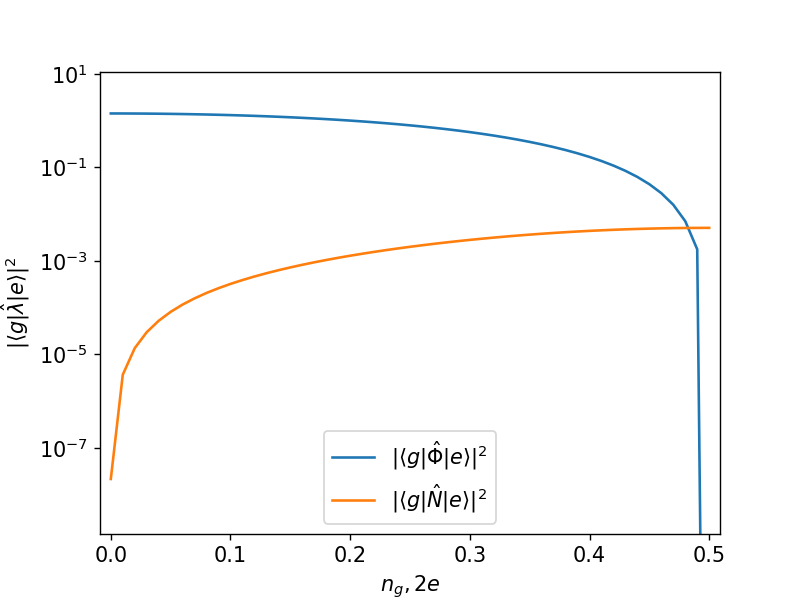

Text(0.5, 0, '$n_g , 2e$')

In [6]:
EL_list = np.logspace(-3 , 0, 51)



fi_ij  = Q.iterate_ng( ng_list, fi_ext, 'get_fi_ij', 0, 1 )

n_ij  = Q.iterate_ng( ng_list, fi_ext,  'get_n_ij' ,0, 1 )


    
fig, ax = plt.subplots()
ax.plot(ng_list, fi_ij**2, '-', label = r'$|\langle g | \hat{\Phi} | e \rangle|^2$')    
ax.plot(ng_list, n_ij**2, '-', label = r'$|\langle g | \hat{N} | e \rangle|^2$')

ax.legend()
# ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'$ |\langle g | \hat{\lambda} | e \rangle|^2 $')
ax.set_xlabel(r'$n_g , 2e$')

# ax2 = ax.twinx()
# # lim = ax.get_ylim()


# # ax2.set_ylim(lim)
# ax2.plot(EL_list, E_0e,'--', label = 'E0e')
# ax2.plot(EL_list, E_1e, '--', label = 'E1e')
# ax2.set_yscale('log')
# ax2.legend()
# # ax2.set_yscale('log')
# # (r'$ \sqrt{S_{\phi}}(\omega)  , \frac{\Phi_0}{\sqrt{Hz}}  $ '
# # ax2.set_ylabel (r'$ \sqrt{S_{n}}(\omega)  , \frac{e}{\sqrt{Hz}}  $ ', color = 'C1')


# fig, ax = plt.subplots()
# ax.plot(EL_list, T_0e, '-', label = '$T_{0e}$')    
# ax.plot(EL_list, T_1e, '-', label = r'$T_{1e}$')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.legend()

### Mel vs Ej/Ecl

In [12]:
g_list = np.linspace(.5, 5.5, 11)
wp_list = [10, 20, 30, 40 ]

E_L = 0.7



qs_list = [ [ ACQubit(E_CL = wp/g/2, E_L = 0.7, E_J = g*wp, E_C = 6.7) for g in g_list ]  for wp in wp_list ]
 

<IPython.core.display.Javascript object>


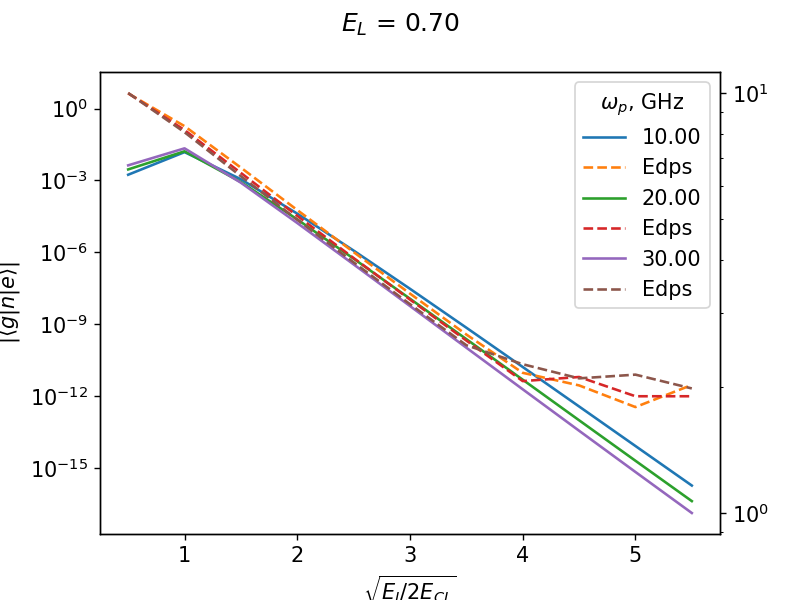

-6.37097625551 3.08766548529
-6.30526283849 2.60113294906
-5.99084059718 1.85285157655


<IPython.core.display.Javascript object>


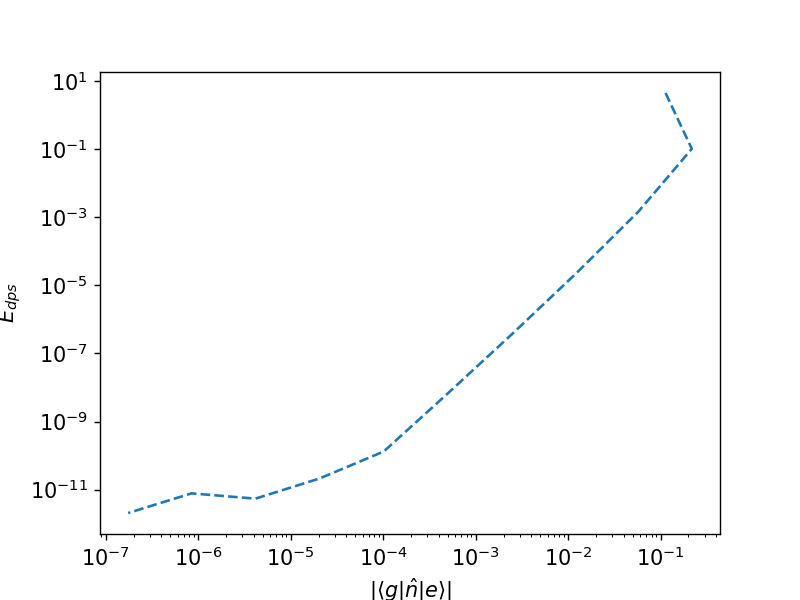

In [55]:


fig, ax = plt.subplots() 

ax2 = ax.twinx()


fig.suptitle('$E_{L}$ = %1.2f'%E_L)

tqs_list = tqdm(qs_list [1:])

for i, qs in enumerate(  tqs_list):
       
        y_plot = []
        Edps = []
        
        for qubit in qs: 
            st = qubit.set_state(ng = 0.5, fi_ext = 0.25 )
            mel = st.get_n_ij(3,1)
            y_plot.append(mel)

            st = qubit.set_state( ng = 0.5, fi_ext = 0.0 )
            
            Edps.append( st.get_E(2) - st.get_E(1) )
            
            
            
        y = np.array(y_plot)
        ax.plot( g_list**1, y**2.5 , label = "%1.2f"% wp_list[i] )
        ax.plot( g_list**1, Edps, '--', label = "Edps" )
        m,b = np.polyfit(g_list, np.log(Edps), 1)
        
        print (m, b)
        

ax.legend(title="$\\omega_{p}$, GHz") 

ax.set_yscale('log')

ax2.set_yscale('log')
# ax.set_xscale('log')


ax.set_xlabel('$\sqrt{ E_J/2E_{CL}}$')
ax.set_ylabel(r'$|\langle g | \hat{n} | e \rangle|$')


fig, ax = plt.subplots() 
ax.plot( y, Edps, '--' )
ax.set_ylabel('$E_{dps}}$')
ax.set_xlabel(r'$|\langle g | \hat{n} | e \rangle|$')
ax.set_xscale('log')
ax.set_yscale('log')

In [22]:
Edps

[4.51657393129741,
 0.10346724056201673,
 0.0015078050047492297,
 2.2895130456390689e-05,
 3.7985978451615665e-07,
 6.8078804815741023e-09,
 1.3093881534587126e-10,
 2.106048668792937e-11,
 5.4001247917767614e-12,
 7.73070496506989e-12,
 2.0463630789890885e-12]

### dEj


In [6]:
dEJ_list = np.linspace(0 , 5, 51)



E_L=0.2


# Qs1 = [ACQubit (E_CL = 15,E_L = E_L, E_J = 33, E_C = 8, dE_J = dej ) for dej in dEJ_list]
Qs_L0p2 = [ACQubit (E_CL = 15,E_L = E_L, E_J = 33, E_C = 8, dE_J = dej ) for dej in dEJ_list]

<IPython.core.display.Javascript object>


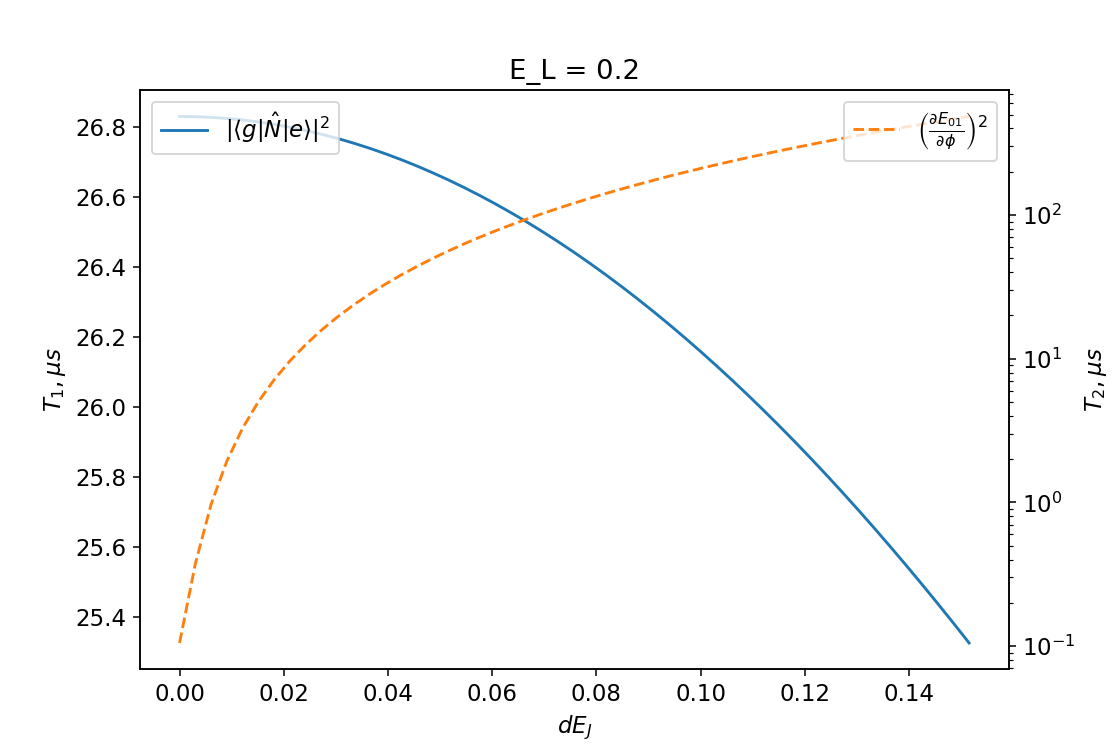

In [7]:
n_ij = []

dEdfi = []

T1 = []

# E_L=0.07

for q in tqdm(Qs_L0p2):
# for q in tqdm(Qs1):    

    Q = q
    

    st1e_05 = Q.set_state(ng = 0.5, fi_ext = 2*pi*0.5)
    st1e_049 = Q.set_state(ng = 0.5, fi_ext = 2*pi*0.499)

    
    n_ij.append( st1e_05.get_n_ij(0,1) )
    
    dEdfi.append( np.abs(st1e_049.get_spectrum()[0] - st1e_05.get_spectrum()[0] )/ 0.0005  )

    T1.append( get_T1_M(Q, 2e-15, fi_ext = 2*pi*0.25, ng = 0.5, i = 0, j = 1)[1] )
fig, ax = plt.subplots()

ax.set_title(f'E_L = {E_L}')
ax2 = ax.twinx()

# ax2.plot(dEJ_list/33, 1/(100*(n_ij - n_ij[0])/n_ij[0]), '--', color = 'C1', label = r'$n_{ij}$' )    

# G1 = np.array(n_ij)**2*1e7
G2 = np.array(dEdfi)**2 * (1e-6)**2*E_L**2 * 1e18

ax2.plot(dEJ_list/33,1e6/G2 , '--', color = 'C1', label = r'$  \left(\frac{\partial E_{01}}{\partial \phi}\right)^2 $' )    


ax2.legend(loc = 1)
ax2.set_yscale('log')

ax2.set_ylabel(r'$ T_2 , \mu s  $')
ax.set_xlabel(r'$dE_J $')


# lim = ax.get_ylim()



# ax2.set_ylim(lim)
ax.plot(dEJ_list/33, 1e6*np.array(T1) , '-', color = 'C0', label = r'$|\langle g | \hat{N} | e \rangle|^2$')
# ax2.set_yscale('log')
ax.set_ylabel(r'$ T_1 , \mu s  $')
ax.legend(loc = 2)


In [105]:
 dEdfi

[-0.12647486555670184,
 -0.12002586026229167,
 -0.11391778075837777,
 -0.10814639858203101,
 -0.10270500415230543,
 -0.097584649533018819,
 -0.092774458732732157,
 -0.088261981253896948,
 -0.08403356404418183,
 -0.080074719250497139,
 -0.076370469211122227,
 -0.072905655314151829,
 -0.069665202709241925,
 -0.066634337439214875,
 -0.063798756512557731,
 -0.061144754140562085,
 -0.058659309013572525,
 -0.056330138337902014,
 -0.054145724658898331,
 -0.05209532101545733,
 -0.050168939565830684,
 -0.048357328087906382,
 -0.046651937955898504,
 -0.045044886684198815,
 -0.043528917235700959,
 -0.042097355992583019,
 -0.040744070670541532,
 -0.039463429126207927,
 -0.038250259789863961,
 -0.03709981405569529,
 -0.03600773098082044,
 -0.034970004361577267,
 -0.033982952208468475,
 -0.033043188660840883,
 -0.032147598145352063,
 -0.031293311752110142,
 -0.030477685645074359,
 -0.029698281410965421,
 -0.028952848134299103,
 -0.028239306144310916,
 -0.027555732222067419,
 -0.026900346150100063,
 

### grid


<IPython.core.display.Javascript object>


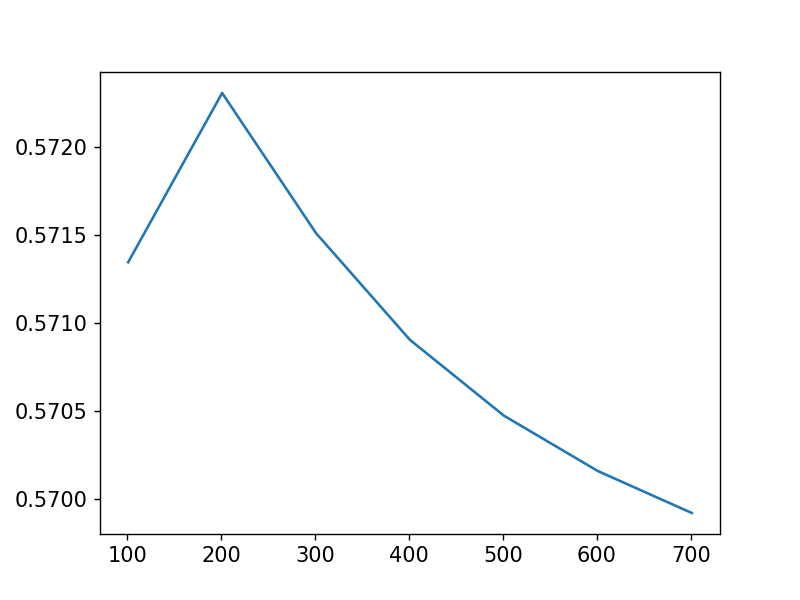

In [7]:
grid_list = [100*i+101 for i in range(7)]

E = []

for gr in grid_list:
    
    ACQB15 = ACQubit (E_CL = 15, 
              E_L = 0.87, 
              E_J = (J1+J2)/2, 
              E_C = 8,
              dE_J = (J2-J1)/2 )
    
    ACQB15.set_grid( fi_grid = [-8*pi, 8*pi, gr], Q_grid = [-2,3])
    st = ACQB15.set_state(ng = 0.5, fi_ext = 2*pi*0.45)
#     E.append(st.get_spectrum()[0])
    E.append(st.get_fi_ij(0,1))
    
    
fig, ax = plt.subplots()
ax.plot( grid_list, E )
    

## 3d Plots


In [9]:

Q = ACQB15

N_ng = 11
N_fi = 11

ng_list = np.linspace(0, 1, N_ng)
fi_ext_list = np.linspace(0, 2*pi, N_fi)

ng_grd, fi_ext_grd = np.meshgrid(ng_list, fi_ext_list/2/pi)

sts = [Q.set_state(ng = n, fi_ext = f) for n in ng_list for f in fi_ext_list ]

In [19]:
np.shape(E3d)

(121, 605)

<IPython.core.display.Javascript object>


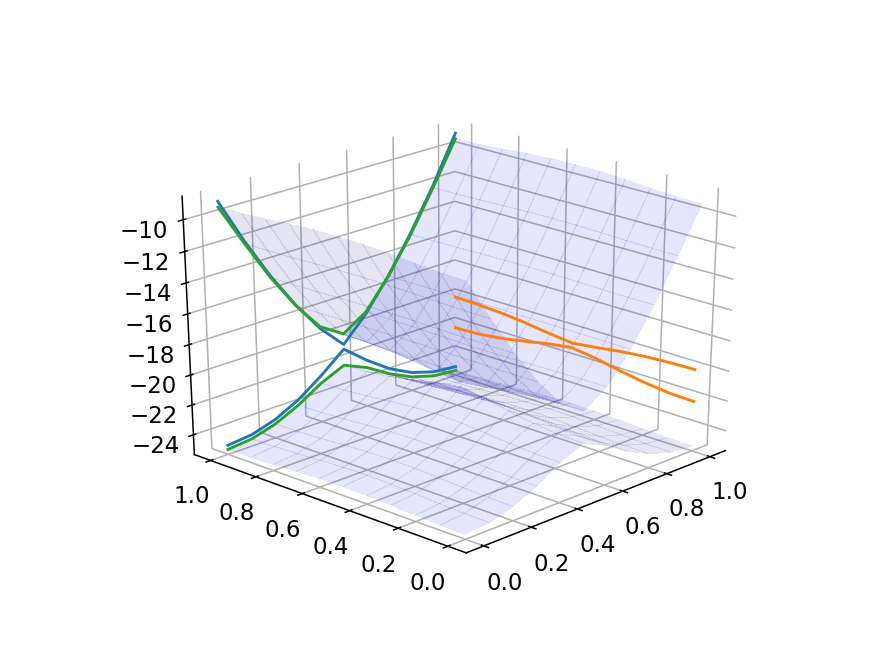

In [43]:
bands = [0,1]

fig = plt.figure()
ax = fig.gca(projection='3d')


for b in bands:

    E3d = np.reshape(np.array([st.get_E()  for st in sts] )[:,b], (N_ng,N_fi ))


    surf = ax.plot_surface(ng_grd, fi_ext_grd, E3d, color = 'b',
                   linewidth=0, antialiased=False, alpha = 0.1)


    ax.plot(ng_list, np.ones(N_fi), E3d[int(N_fi/2)], c = 'C0' )
    ax.plot(np.ones(N_ng),fi_ext_list/2/pi , E3d[:, int(N_ng/2)], c = 'C1' )
    ax.plot(ng_list, np.ones(N_fi), E3d[0], c = 'C2' )
#     ax.plot(np.ones(N_ng),fi_ext_list/2/pi , E3d[:, 0], c = 'C2' )

    
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
# ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
